# Загрузка библиотек

Загрузка исходная

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', max_open_warning = 0)
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,LinearRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
Model_choice = pd.DataFrame(columns=['Model', 'MAE', 'R squared'])
from sklearn.neighbors import KNeighborsRegressor
import pickle

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


# Загрузка данных

Загрузка датасетов

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_xbp = pd.read_excel('/content/drive/MyDrive/X_bp.xlsx',index_col=0)
df_xbp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [ ]:
df_xnup = pd.read_excel('/content/drive/MyDrive/X_nup.xlsx',index_col=0)
df_xnup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


IT'S MERGE TIME, тип объединения INNER

In [ ]:
df = df_xbp.merge(df_xnup, left_index = True, right_index = True, how = 'inner')

# Первый этап работы с данными, предобработка и разведочный анализ

In [ ]:
df.info()
##Посмотрим, что у нас в датасете

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

In [ ]:
df.head(10)
## Для примера первые десять строк

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
5.0,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
6.0,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0
7.0,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0.0,7.0,47.0
8.0,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0.0,7.0,57.0
9.0,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,7.0,60.0


Statistics

In [ ]:
df.describe()
## Смотрим на основные статистические характерестики

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


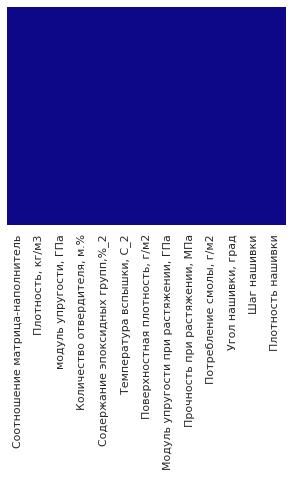

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma')
## Проверяем данные на пропуска, пропусков - нет

In [ ]:
## Т.к. картинка выше выглядит убого, проверим другим методом, чтоб наверняка
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
#посмотрим уникальность значений в колонках, выведем на экран последние 10 значений
for column in df.columns:
    print(f'Колонка {column}')
    print(sorted(df[column].unique())[-10:])

Колонка Соотношение матрица-наполнитель
[5.11078055270228, 5.12036847803355, 5.21044243868871, 5.25889457769596, 5.29584199270212, 5.3141436851035, 5.42513947440363, 5.45295943131032, 5.45556617827335, 5.59174159869754]
Колонка Плотность, кг/м3
[2160.0, 2160.75143947764, 2161.56521646388, 2170.34236302043, 2172.24679646503, 2182.75182183283, 2184.49319952038, 2192.29763744164, 2192.73878348, 2207.77348061119]
Колонка модуль упругости, ГПа
[1542.1684576617, 1543.02368299018, 1546.29088574472, 1572.09604227992, 1588.67721742116, 1615.09697286127, 1628.0, 1649.41570587587, 1815.86516990736, 1911.53647700054]
Колонка Количество отвердителя, м.%
[179.645961730628, 181.032809196701, 181.82844779488, 188.049897892565, 190.318107209251, 191.053003718703, 192.334469461448, 192.705385447053, 192.85170183308, 198.953207190451]
Колонка Содержание эпоксидных групп,%_2
[27.6337424773947, 27.7076817364195, 27.8131831807932, 27.9208432694113, 28.3249680236444, 28.6201157898466, 28.8489016191684, 28.90

In [ ]:
## Для наглядности в виде гистограмм
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

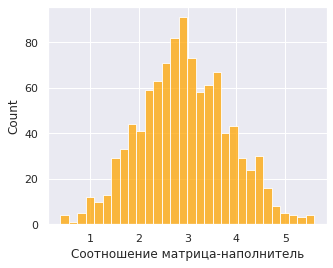

In [ ]:
sns.histplot(df['Соотношение матрица-наполнитель'], kde=False, bins=30, color='Orange')
sns.set(rc={'figure.figsize':(5,4)})

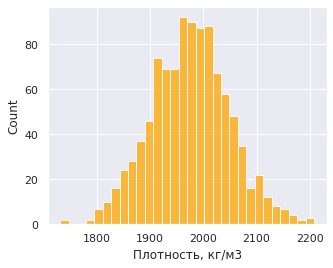

In [ ]:
sns.histplot(df['Плотность, кг/м3'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

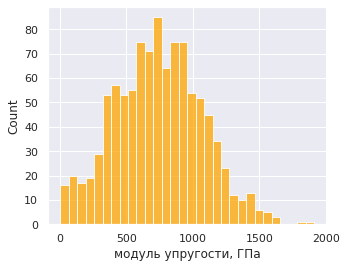

In [ ]:
sns.histplot(df['модуль упругости, ГПа'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

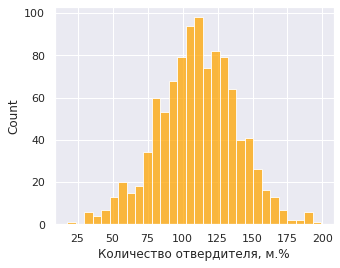

In [ ]:
sns.histplot(df['Количество отвердителя, м.%'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

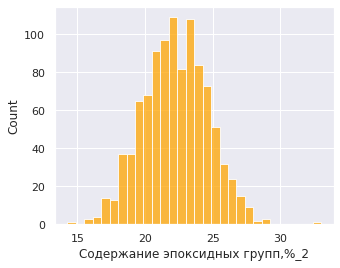

In [ ]:
sns.histplot(df['Содержание эпоксидных групп,%_2'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

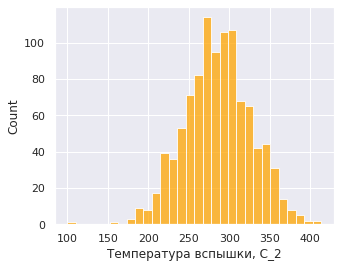

In [ ]:
sns.histplot(df['Температура вспышки, С_2'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

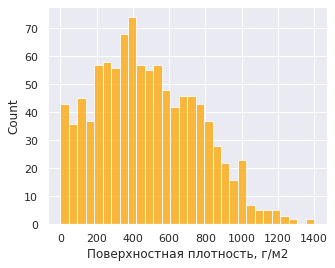

In [ ]:
sns.histplot(df['Поверхностная плотность, г/м2'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

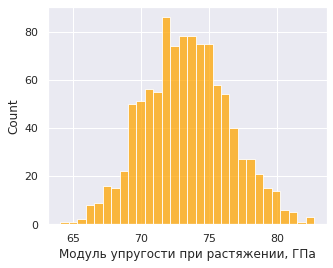

In [ ]:
sns.histplot(df['Модуль упругости при растяжении, ГПа'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

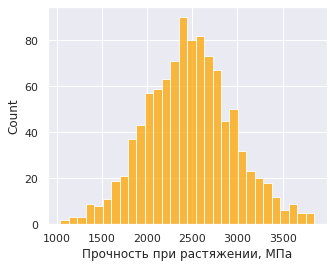

In [ ]:
sns.histplot(df['Прочность при растяжении, МПа'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

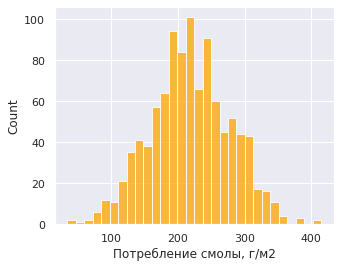

In [ ]:
sns.histplot(df['Потребление смолы, г/м2'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

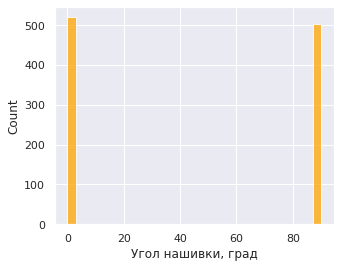

In [ ]:
sns.histplot(df['Угол нашивки, град'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

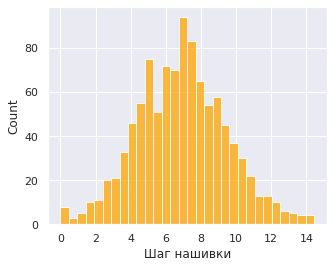

In [ ]:
sns.histplot(df['Шаг нашивки'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

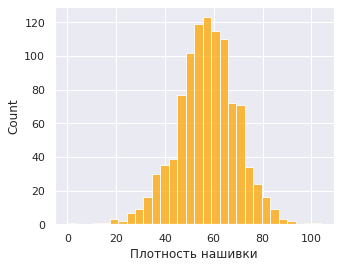

In [ ]:
sns.histplot(df['Плотность нашивки'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

Для большинства характеристик распределение близко к нормальному
 Исключение составляют:
 - Поверхностная плотность, г/м2 - нормальное распределение со смещением вправо. 
 - Угол нашивки, град - дискретное распределение, так как колонка содержит всего два уникальных значения

# Ящики с усами

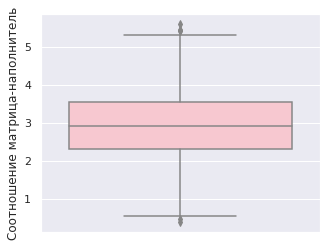

In [ ]:
sns.boxplot(y='Соотношение матрица-наполнитель', data=df, color='pink');

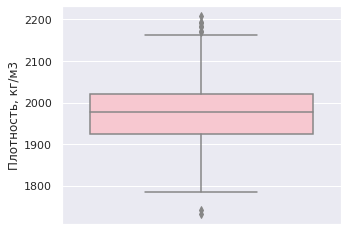

In [ ]:
sns.boxplot(y='Плотность, кг/м3', data=df, color='pink')

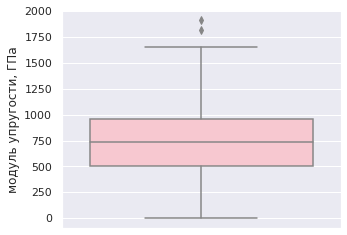

In [ ]:
sns.boxplot(y='модуль упругости, ГПа', data=df, color='pink')

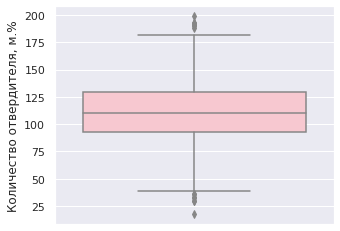

In [ ]:
sns.boxplot(y='Количество отвердителя, м.%', data=df, color='pink')

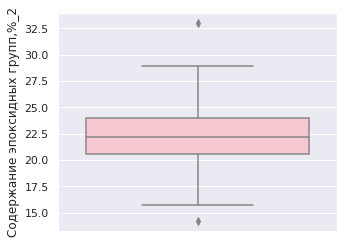

In [ ]:
sns.boxplot(y='Содержание эпоксидных групп,%_2', data=df, color='pink')

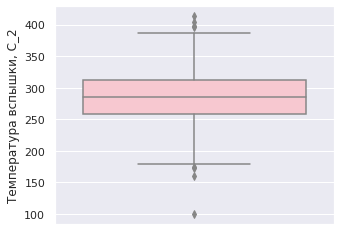

In [ ]:
sns.boxplot(y='Температура вспышки, С_2', data=df, color='pink')

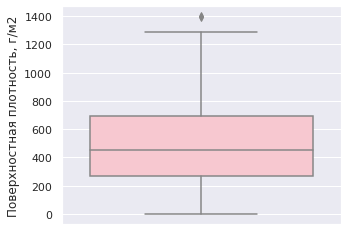

In [ ]:
sns.boxplot(y='Поверхностная плотность, г/м2', data=df, color='pink')

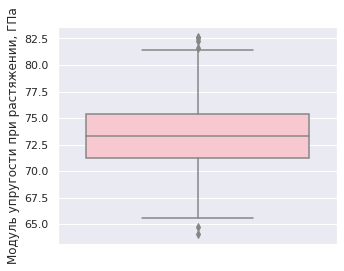

In [ ]:
sns.boxplot(y='Модуль упругости при растяжении, ГПа', data=df, color='pink')

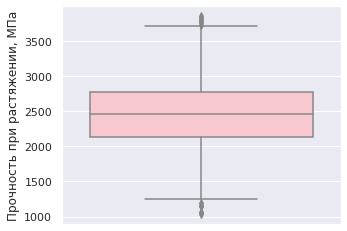

In [ ]:
sns.boxplot(y='Прочность при растяжении, МПа', data=df, color='pink')

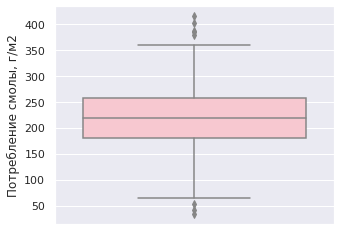

In [ ]:
sns.boxplot(y='Потребление смолы, г/м2', data=df, color='pink')

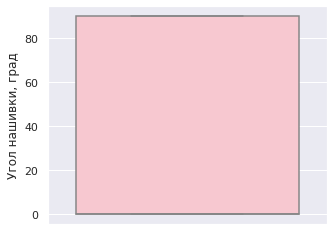

In [ ]:
sns.boxplot(y='Угол нашивки, град', data=df, color='pink')
## Величина дискретная = график не показателен

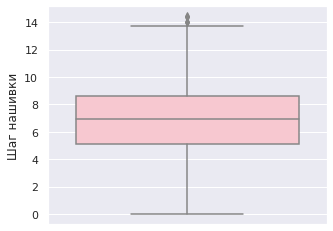

In [ ]:
sns.boxplot(y='Шаг нашивки', data=df, color='pink')

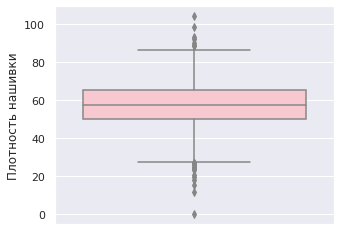

In [ ]:
sns.boxplot(y='Плотность нашивки', data=df, color='pink')

# Попарный графики рассеяния точек

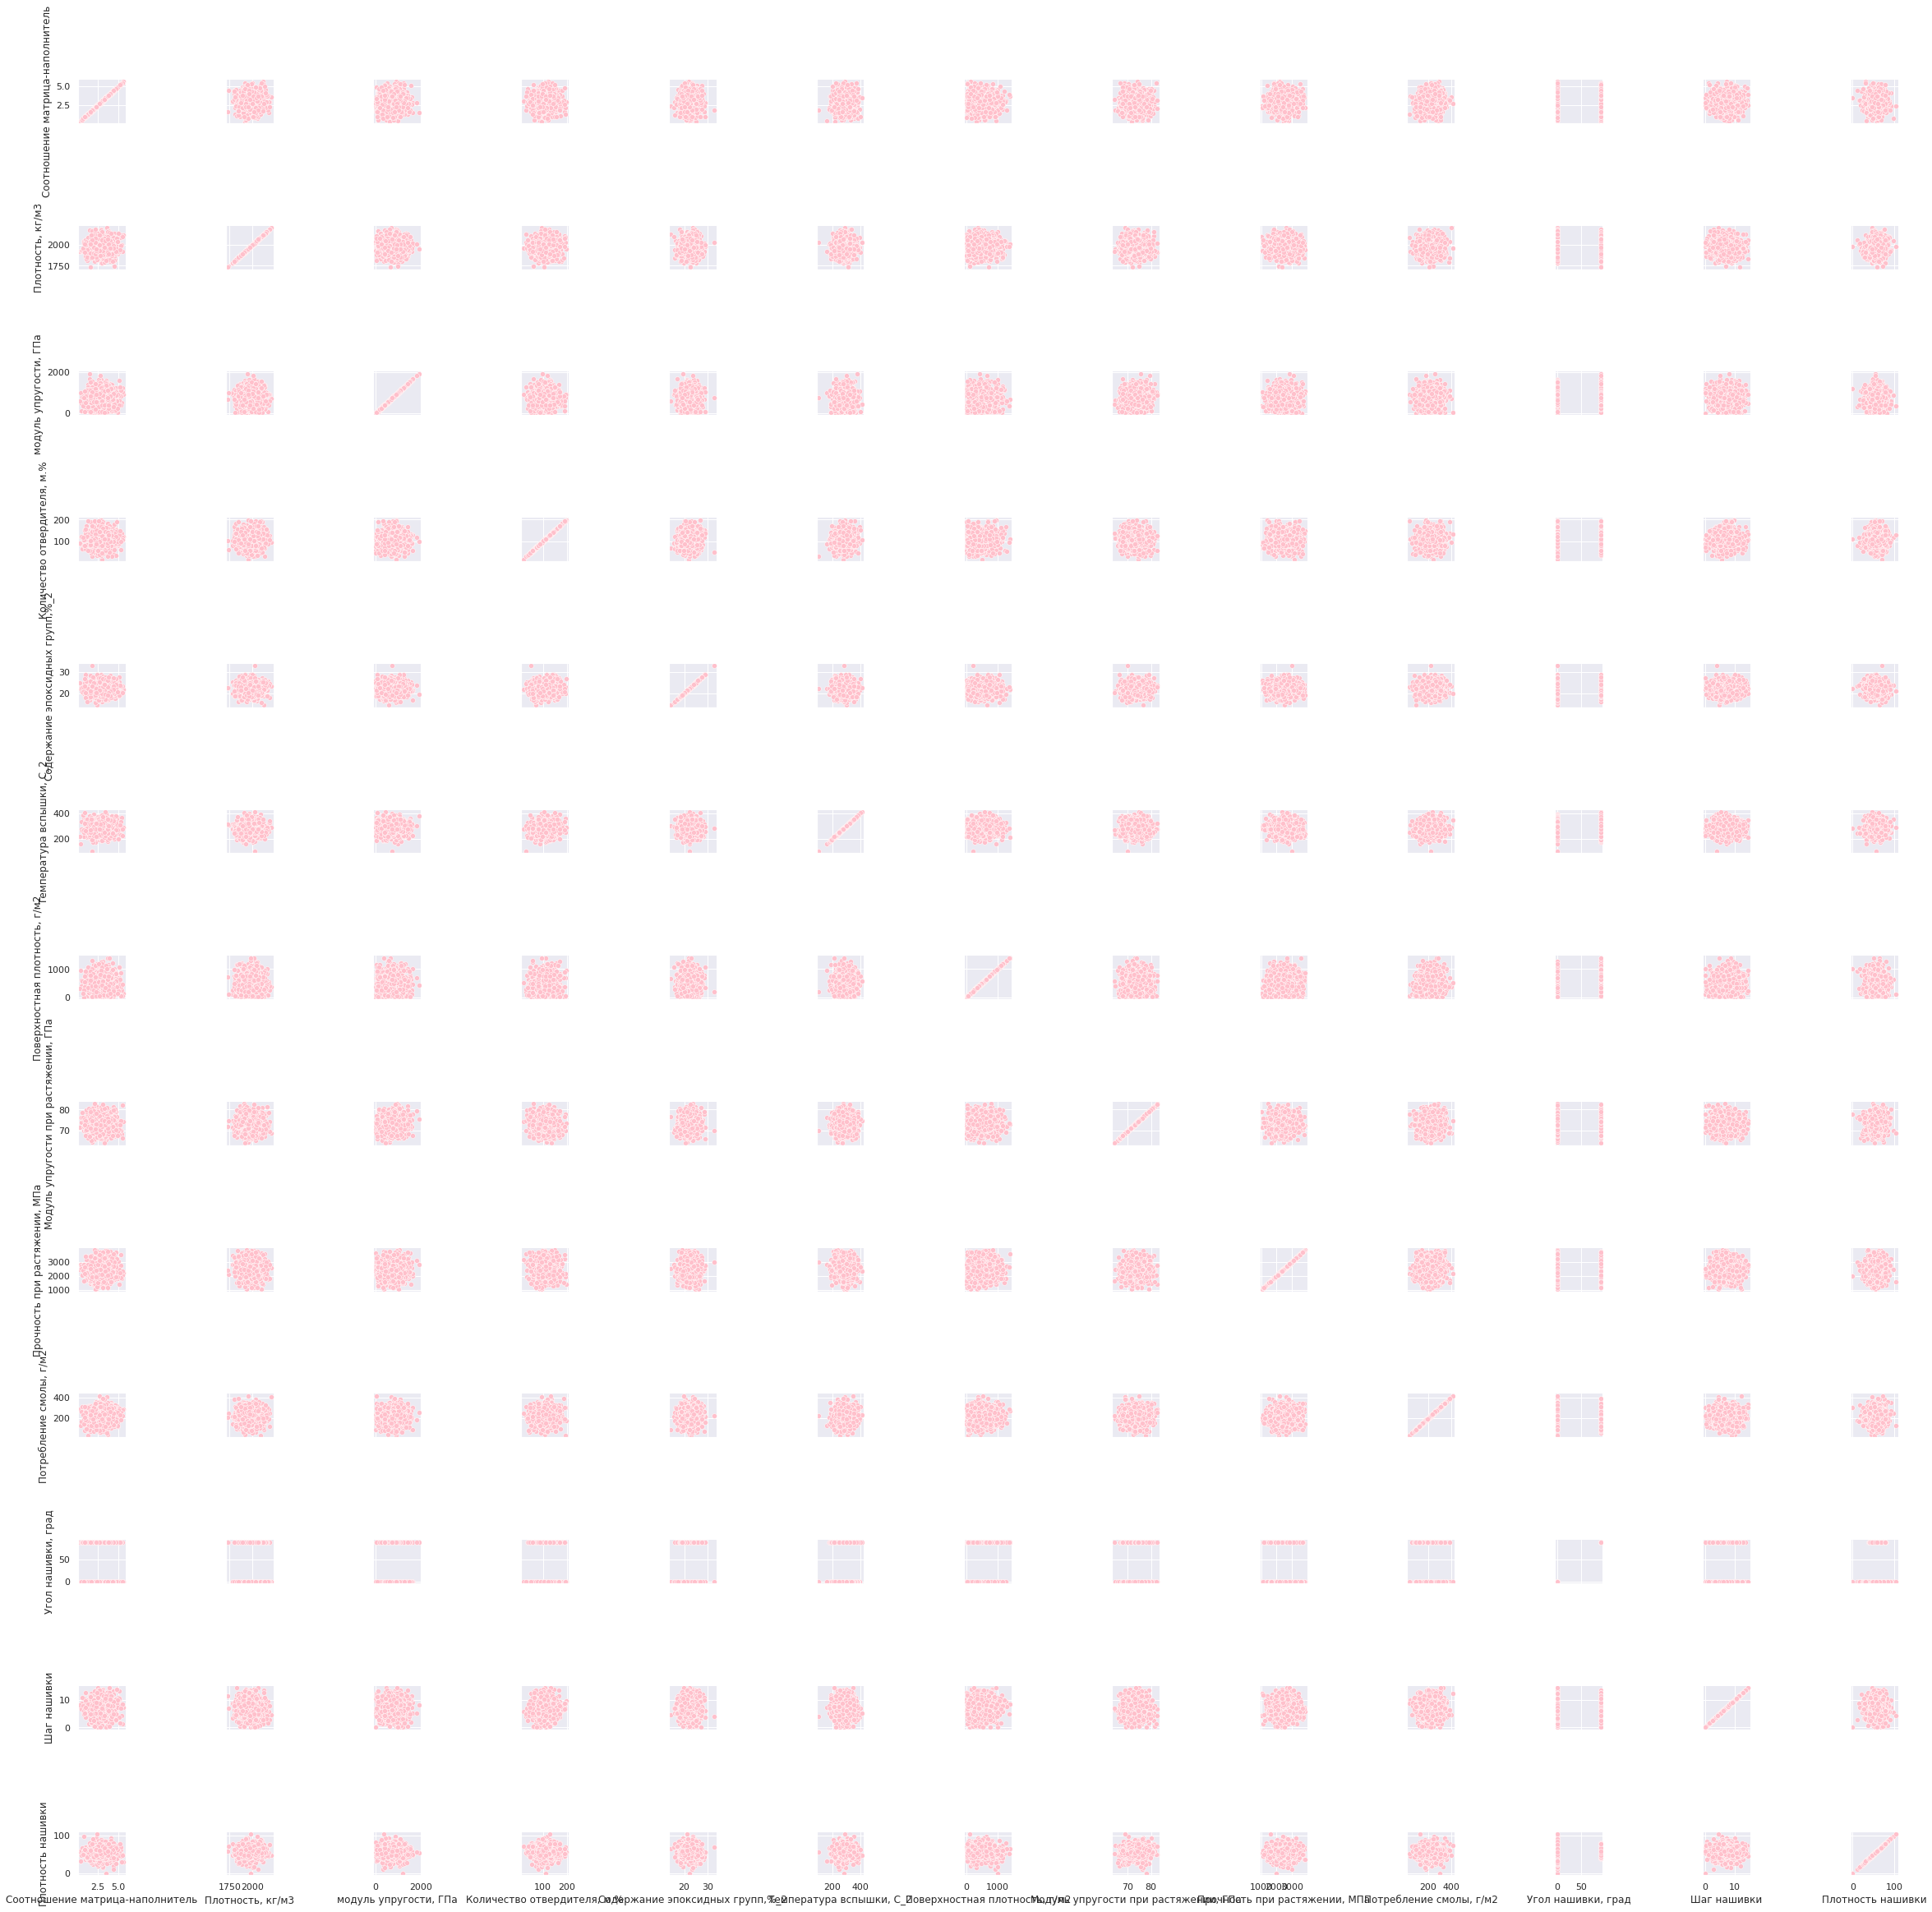

In [ ]:
columns = df.columns
g = sns.PairGrid(df[columns])
g.map(sns.scatterplot, color ='pink')
## сегодня день розовой пантеры
## P.S. Попарные графики рассеяния показывают очень слабую зависимость между переменными датасета

# Посмотрим что у нас с корреляцией 

In [ ]:
df.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


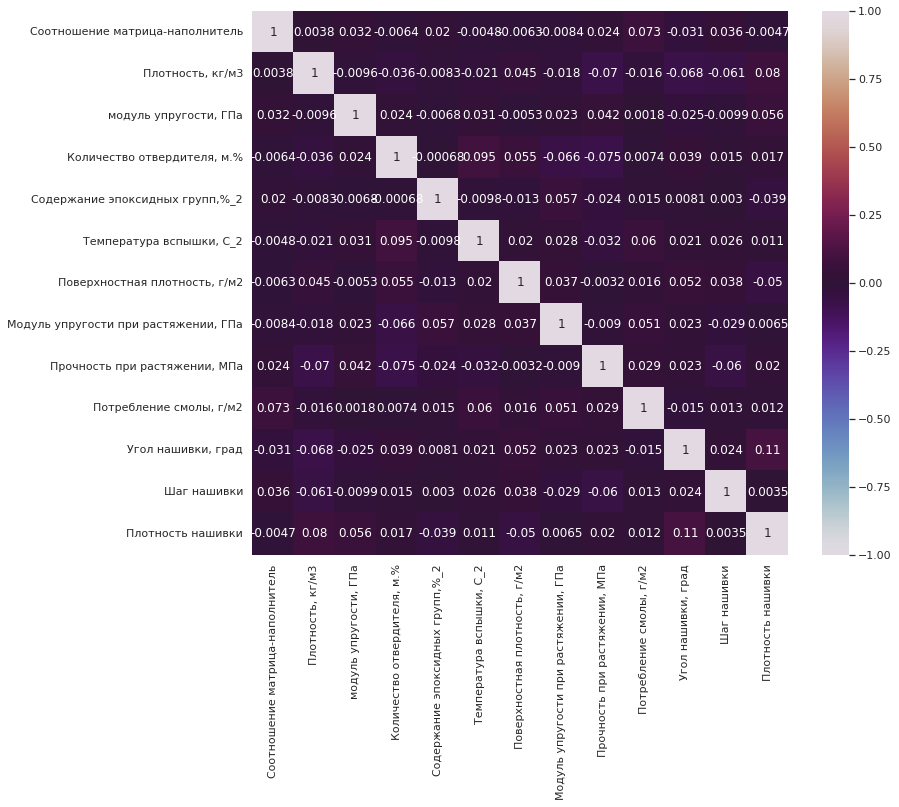

In [ ]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'twilight')

Из тепловой карты мы наглядно видим наличие слабых прямых и обратных связей переменных в датасете. Одно из идей, что данные были предобработаны.

# Предобработка данных и удаление выбросов

In [ ]:
for column in df.columns:
    q75,q25 = np.percentile(df.loc[:,column],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[column] < min,column] = np.nan
    df.loc[df[column] > max,column] = np.nan

In [ ]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [ ]:
## Количество выбрасов маленькое, можно и удалить
df_1 = df.dropna(axis = 0)

In [ ]:
## Обновим стат данные датасета
df_1.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,2.925683,1974.040023,738.247627,110.916216,22.209030,286.040414,482.993901,73.305127,2467.488822,217.613374,0.511752,6.915585,57.451895
std,0.893712,70.808120,328.708665,27.037891,2.394871,39.400677,280.190377,3.037381,463.838911,57.827255,0.500129,2.509672,11.239331
min,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.553336,1250.392802,63.685698,0.000000,0.037639,27.272928
25%,2.321931,1923.443748,498.577158,92.523816,20.571516,259.184486,266.004099,71.248823,2146.936034,179.489091,0.000000,5.134988,50.209656
50%,2.904731,1977.258043,738.736842,111.113175,22.184713,286.024118,457.732246,73.259230,2457.959767,218.388715,1.000000,6.943337,57.584225
75%,3.546650,2020.158764,958.418993,130.001450,23.961818,312.991425,695.900862,75.310788,2755.169485,256.396777,1.000000,8.591450,64.798211
max,5.314144,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,81.417126,3705.672523,359.052220,1.000000,13.732404,86.012427


-Уменшилось количество строк в датасете, т.к. очистка

In [ ]:
## Cтандартизируем датасет
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df_1)
    scaled = pd.DataFrame(scaled, columns=df_1.columns)
    return 2

In [ ]:
df_2 = preprocessing.scale(df_1)
df_2

array([[-1.19626041e+00,  7.90727015e-01,  1.48909031e-03, ...,
        -1.02378711e+00, -1.16236017e+00,  2.26834437e-01],
       [-1.19626041e+00,  7.90727015e-01,  1.48909031e-03, ...,
        -1.02378711e+00, -7.63688777e-01, -9.30436440e-01],
       [-1.72801658e-01,  7.90727015e-01,  4.49037754e-02, ...,
        -1.02378711e+00, -7.63688777e-01, -4.02280731e-02],
       ...,
       [ 3.97343894e-01, -2.35573193e-02, -9.78322048e-01, ...,
         9.76765571e-01, -1.09811268e+00,  9.06035304e-01],
       [ 8.72859512e-01,  1.31071605e+00,  9.82516132e-03, ...,
         9.76765571e-01, -2.40153217e-01,  7.20337816e-02],
       [ 9.87800071e-01, -1.18166198e+00, -9.76861896e-01, ...,
         9.76765571e-01, -3.33561577e-01,  1.77886537e+00]])

# Нормализация данных

In [ ]:
mms = MinMaxScaler()
df_3 = pd.DataFrame(mms.fit_transform(df_used), columns=df_used.columns, index=df_used.index)

In [ ]:
df_3.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Модель

In [ ]:
df_3.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [ ]:
X = df_3.drop('Модуль упругости при растяжении, ГПа', axis=1)
y = df_3['Модуль упругости при растяжении, ГПа']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 655
Размер тестовой выборки: 281


# Линейная регрессия

In [ ]:
%%time
model_LN_1 = LinearRegression()
model_LN_1.fit(X_train, y_train)
y_pred = model_LN_1.predict(X_test)

CPU times: user 6.37 ms, sys: 11 µs, total: 6.38 ms
Wall time: 6.01 ms


# Random forest

In [ ]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

CPU times: user 31.7 s, sys: 158 ms, total: 31.9 s
Wall time: 31.9 s


In [ ]:
model_RFR_1 = GSCV.best_estimator_

In [ ]:
%%time
model_RFR_1.fit(X_train, y_train)

CPU times: user 117 ms, sys: 988 µs, total: 118 ms
Wall time: 148 ms


RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=40,
                      random_state=42)

In [ ]:
model_RFR_1.predict(X_test)

array([0.50649498, 0.52732687, 0.50287373, 0.50729529, 0.50057547,
       0.53567188, 0.50422194, 0.5314229 , 0.50000176, 0.56397894,
       0.48797294, 0.50619805, 0.49501766, 0.50097233, 0.49447199,
       0.51765762, 0.48734553, 0.47863716, 0.48087272, 0.49604171,
       0.4415531 , 0.48526992, 0.49459913, 0.49485778, 0.53656899,
       0.48901618, 0.50445905, 0.50281113, 0.47649323, 0.50454288,
       0.49862882, 0.50803969, 0.48422401, 0.51661753, 0.47172707,
       0.48593305, 0.46430395, 0.47962936, 0.51677445, 0.49078228,
       0.47733641, 0.52861093, 0.49698842, 0.49019645, 0.52315072,
       0.52590874, 0.51131778, 0.47484814, 0.52485113, 0.51147791,
       0.46501123, 0.48874618, 0.46305687, 0.5081358 , 0.47388061,
       0.52206781, 0.52987069, 0.48420041, 0.47485187, 0.46800354,
       0.48835978, 0.48415384, 0.50173663, 0.51105179, 0.47619171,
       0.49057879, 0.50397878, 0.49142012, 0.48341237, 0.47277112,
       0.45553709, 0.4906044 , 0.47446525, 0.48355523, 0.45217

In [ ]:
y_test

431.0    0.223731
45.0     0.655833
803.0    0.387603
674.0    0.585272
38.0     0.373538
           ...   
608.0    0.694506
487.0    0.536380
62.0     0.551152
399.0    0.433448
652.0    0.662165
Name: Модуль упругости при растяжении, ГПа, Length: 281, dtype: float64

In [ ]:
np.mean(np.abs(y_test-model_RFR_1.predict(X_test)))

0.16221910397564496

In [ ]:
np.mean(np.abs(y_test-np.mean(y_test)))

0.1586289003060272

# Модель, при растяжении

In [ ]:
X = df_3.drop('Прочность при растяжении, МПа', axis=1)
y = df_3['Прочность при растяжении, МПа']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 655
Размер тестовой выборки: 281


In [ ]:
%%time
model_LN_2 = LinearRegression()
model_LN_2.fit(X_train, y_train)
y_pred = model_LN_2.predict(X_test)

CPU times: user 7.2 ms, sys: 0 ns, total: 7.2 ms
Wall time: 9.46 ms


In [ ]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

CPU times: user 31.9 s, sys: 152 ms, total: 32 s
Wall time: 33.7 s


In [ ]:
model_RFR_2 = GSCV.best_estimator_

In [ ]:
%%time
model_RFR_2.fit(X_train, y_train)

CPU times: user 69.9 ms, sys: 1.99 ms, total: 71.9 ms
Wall time: 71.4 ms


RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=40,
                      random_state=42)

In [ ]:
model_RFR_2.predict(X_test)

array([0.49686089, 0.49999882, 0.5054892 , 0.5021551 , 0.48891242,
       0.51746805, 0.51120372, 0.53320512, 0.50477921, 0.49231381,
       0.50689968, 0.47555487, 0.49840839, 0.49683357, 0.51712753,
       0.50670868, 0.4922499 , 0.53587475, 0.49302953, 0.50482486,
       0.50667554, 0.5070589 , 0.48625112, 0.50259938, 0.50003996,
       0.49161248, 0.49867478, 0.51358483, 0.4870555 , 0.50181859,
       0.53370883, 0.5027511 , 0.50373148, 0.49400987, 0.51624591,
       0.48986281, 0.46811421, 0.503498  , 0.49448305, 0.49132658,
       0.49273779, 0.49718148, 0.48644551, 0.49410716, 0.51778911,
       0.50506723, 0.5091759 , 0.49496237, 0.51076194, 0.51449689,
       0.49242091, 0.5183932 , 0.5251085 , 0.49084307, 0.48707878,
       0.48580723, 0.52107269, 0.48625541, 0.49208192, 0.48947504,
       0.50260144, 0.49416746, 0.48631904, 0.48099511, 0.48983681,
       0.46635541, 0.49949769, 0.49967516, 0.49504027, 0.51835985,
       0.49209487, 0.51195861, 0.4657057 , 0.50795254, 0.50481

In [ ]:
y_test

431.0    0.140630
45.0     0.158646
803.0    0.583773
674.0    0.328720
38.0     0.606789
           ...   
608.0    0.543305
487.0    0.499028
62.0     0.655680
399.0    0.649320
652.0    0.539078
Name: Прочность при растяжении, МПа, Length: 281, dtype: float64

In [ ]:
np.mean(np.abs(y_test-model_RFR_2.predict(X_test)))

0.1510071159707289

In [ ]:
np.mean(np.abs(y_test-np.mean(y_test)))

0.14880406564050755

In [ ]:
def get_metrics(model):
    predicted = model.predict(X_test)
    return (
            mean_absolute_error(predicted, y_test), 
            r2_score(predicted, y_test)
           )
                      
models_res = [get_metrics(model_LN_1), get_metrics(model_RFR_1), get_metrics(model_LN_2), get_metrics(model_RFR_2)]
res_data = {'наименование модели': ['Линейная регрессия_МУ', 'Случайный лес_МУ', 'Линейная регрессия_ПР', 'Случайный лес_ПР'], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res], 
            'r2_score'  : [model_res[1] for model_res in models_res]
       }
pd.DataFrame(res_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Модуль упругости при растяжении, ГПа
Feature names seen at fit time, yet now missing:
- Прочность при растяжении, МПа

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Модуль упругости при растяжении, ГПа
Feature names seen at fit time, yet now missing:
- Прочность при растяжении, МПа

  warnings.warn(message, FutureWarning)


,наименование модели,mean_absolute_error,r2_score
0,Линейная регрессия_МУ,0.148908,-37.247571
1,Случайный лес_МУ,0.150258,-51.112809
2,Линейная регрессия_ПР,0.150917,-32.786002
3,Случайный лес_ПР,0.151007,-115.566361


# Нейросеть, о да

In [ ]:
#df_1 = df_1.dropna(axis = 0)
#df_1 = df_1.drop(['Плотность, кг/м3', 'модуль упругости, ГПа','Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
df_1 = df_1.reset_index(drop=True)
X = df_1.drop('Соотношение матрица-наполнитель', axis=1)
y = df_1['Соотношение матрица-наполнитель']

In [ ]:
X

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
1,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
2,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
3,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
4,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
931,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1.0,9.076380,47.019770
932,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1.0,10.565614,53.750790
933,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1.0,4.161154,67.629684
934,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1.0,6.313201,58.261074


In [ ]:
y

0      1.857143
1      1.857143
2      2.771331
3      2.767918
4      2.569620
         ...   
931    2.271346
932    3.444022
933    3.280604
934    3.705351
935    3.808020
Name: Соотношение матрица-наполнитель, Length: 936, dtype: float64

In [ ]:
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 655
Размер тестовой выборки: 281


In [ ]:
X_train

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
700,1870.970330,498.194241,133.702940,20.865008,319.371724,675.284293,75.004786,3116.574226,255.178647,1.0,9.917468,53.197072
331,1948.417954,798.311454,91.218699,20.627116,254.458479,115.760106,72.814830,3323.638821,104.137311,0.0,8.779019,43.709842
46,1987.259859,403.395230,112.719826,19.390511,336.245384,352.831984,73.016489,2016.503637,206.693379,0.0,6.303773,72.152019
277,1895.084314,539.966472,151.843877,21.630084,311.756871,760.993126,69.384017,2770.622771,97.401814,0.0,7.775213,61.420717
787,1967.481344,846.448454,107.207380,18.083115,324.982919,267.147526,67.728967,2574.603443,256.106133,1.0,9.670077,54.823989
...,...,...,...,...,...,...,...,...,...,...,...,...
767,1978.941318,1117.484357,116.796585,19.484366,288.247732,350.439454,72.392051,2460.997418,207.556171,1.0,12.124311,49.725199
72,1949.454587,638.939797,114.528376,25.798830,281.114391,293.444452,76.836063,2331.469527,147.007067,0.0,6.845036,49.753858
908,1923.255135,763.917381,139.248221,25.604559,246.852112,184.457314,68.535599,2331.299167,295.850430,1.0,8.784742,54.227573
235,1982.011195,814.622757,91.493812,22.912466,268.503875,805.136485,73.097493,2186.781209,199.311995,0.0,10.199198,60.631701


In [ ]:
y_train

700    4.232094
331    2.802618
46     3.057830
277    1.595285
787    1.019830
         ...   
767    2.893101
72     4.433176
908    3.824131
235    3.134842
37     3.034399
Name: Соотношение матрица-наполнитель, Length: 655, dtype: float64

In [ ]:
goal = np.array(X_train)
goal_normalizer = layers.Normalization(input_shape=[12,], axis=None)
goal_normalizer.adapt(goal)

In [ ]:
goal

array([[1.87097033e+03, 4.98194241e+02, 1.33702940e+02, ...,
        1.00000000e+00, 9.91746753e+00, 5.31970718e+01],
       [1.94841795e+03, 7.98311454e+02, 9.12186989e+01, ...,
        0.00000000e+00, 8.77901921e+00, 4.37098416e+01],
       [1.98725986e+03, 4.03395230e+02, 1.12719826e+02, ...,
        0.00000000e+00, 6.30377285e+00, 7.21520187e+01],
       ...,
       [1.92325513e+03, 7.63917381e+02, 1.39248221e+02, ...,
        1.00000000e+00, 8.78474220e+00, 5.42275732e+01],
       [1.98201119e+03, 8.14622757e+02, 9.14938121e+01, ...,
        0.00000000e+00, 1.01991975e+01, 6.06317011e+01],
       [1.96840139e+03, 4.55871019e+02, 6.14212965e+01, ...,
        0.00000000e+00, 7.85616655e+00, 6.43019638e+01]])

In [ ]:
goal_normalizer

In [ ]:
import datetime

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(1024, activation='relu'),
      layers.Dense(1024, activation='relu'), 
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))
    return model

In [ ]:
dnn_goal_model = build_and_compile_model(goal_normalizer)
dnn_goal_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1024)              13312     
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,063,940
Trainable params: 1,063,937
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_goal_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=20)

Epoch 1/20
17/17 [==============================] - 2s 46ms/step - loss: 1.9527 - val_loss: 1.0596
Epoch 2/20
17/17 [==============================] - 1s 31ms/step - loss: 0.8752 - val_loss: 0.7873
Epoch 3/20
17/17 [==============================] - 0s 27ms/step - loss: 0.7894 - val_loss: 0.8834
Epoch 4/20
17/17 [==============================] - 1s 33ms/step - loss: 0.7917 - val_loss: 0.7677
Epoch 5/20
17/17 [==============================] - 1s 47ms/step - loss: 0.8241 - val_loss: 0.7695
Epoch 6/20
17/17 [==============================] - 1s 30ms/step - loss: 0.8223 - val_loss: 0.7728
Epoch 7/20
17/17 [==============================] - 1s 30ms/step - loss: 0.7911 - val_loss: 0.7971
Epoch 8/20
17/17 [==============================] - 0s 29ms/step - loss: 0.7865 - val_loss: 0.8195
Epoch 9/20
17/17 [==============================] - 0s 29ms/step - loss: 0.7892 - val_loss: 0.8488
Epoch 10/20
17/17 [==============================] - 0s 26ms/step - loss: 0.7894 - val_loss: 0.8122
Epoch 11/

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 2])
    plt.xlabel('epoch')
    plt.ylabel('MSE [MPG]')
    plt.legend()
    plt.grid(True)

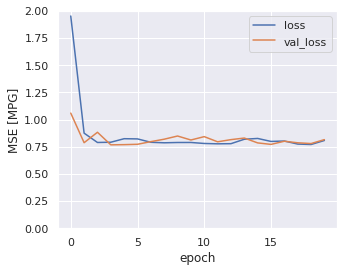

In [ ]:
plot_loss(history)

In [ ]:
X_test

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
386,2079.216323,516.439005,77.330334,24.799019,223.749031,402.943972,69.102559,1595.679674,246.810874,0.0,3.930057,43.082373
41,1913.379677,822.918735,143.576937,24.275588,274.988794,260.859341,75.957329,1639.912525,248.244330,0.0,7.656211,33.571024
725,1940.875616,813.505178,108.267128,23.655577,270.778521,799.826151,71.702195,2683.718348,138.241717,1.0,7.628923,52.488265
605,2053.292814,985.791212,59.207283,22.403912,299.670865,432.572807,74.837967,2057.493213,143.693207,1.0,0.305723,73.389838
35,2085.495837,931.310636,110.564840,23.487140,270.286765,278.230020,71.479060,2740.229631,187.861373,1.0,10.000000,60.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
543,2050.006700,1137.892383,136.038193,22.500389,275.196921,1230.465214,76.570828,2584.359640,187.878352,1.0,10.154591,63.195156
433,2087.646817,4.339154,76.784021,18.552220,258.302450,68.508119,74.062349,2475.645729,237.850070,0.0,10.466131,82.525493
57,2019.065966,1081.412660,135.949276,21.497303,362.877362,34.488906,74.296701,2860.270961,186.555662,0.0,6.281150,72.292880
355,2095.716754,920.762817,105.778668,20.532135,244.476593,859.432338,72.429467,2844.655510,196.442031,0.0,4.538571,63.561645


In [ ]:
y_test

386    3.318032
41     4.315666
725    3.149638
605    3.858755
35     2.444177
         ...   
543    4.301891
433    2.920376
57     2.097746
355    3.027069
584    2.007141
Name: Соотношение матрица-наполнитель, Length: 281, dtype: float64

In [ ]:
len(y_test)

281

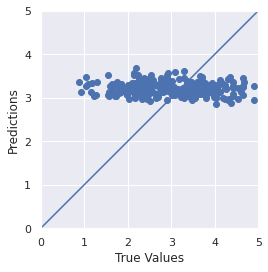

In [ ]:
test_predictions = dnn_goal_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions

array([3.2126215, 2.9460723, 3.1705816, 3.1782336, 3.3408623, 3.2868698,
       3.2150488, 2.9796515, 2.988651 , 3.4180055, 3.0579915, 3.3349438,
       3.3668664, 3.1401107, 2.96926  , 3.108448 , 3.1354213, 3.122816 ,
       3.3448322, 3.07556  , 3.05353  , 3.4091418, 3.5240445, 3.000726 ,
       3.2352278, 3.0976484, 3.2551985, 3.3641999, 3.2551413, 2.9619532,
       3.299745 , 3.3291774, 3.179448 , 3.4449542, 3.0880961, 3.049413 ,
       3.1347642, 3.046434 , 3.1027517, 3.3095126, 3.3154502, 3.1407762,
       3.3465056, 3.2107744, 3.2750392, 3.2271585, 3.1325426, 3.3386416,
       3.3047624, 3.0268898, 3.244156 , 2.99089  , 3.2118   , 3.29186  ,
       3.200759 , 3.3982782, 3.2563736, 3.2833145, 3.395845 , 3.362678 ,
       3.3588958, 3.0682776, 3.0039263, 3.233314 , 3.1763706, 3.3692117,
       3.2795758, 3.2949057, 3.128936 , 3.3126192, 3.196143 , 3.4233432,
       3.2926693, 3.3088782, 3.6083112, 3.1220212, 3.2332253, 3.149324 ,
       3.302586 , 3.2867532, 3.2227318, 3.1763883, 

In [ ]:
test_predictions

array([3.2126215, 2.9460723, 3.1705816, 3.1782336, 3.3408623, 3.2868698,
       3.2150488, 2.9796515, 2.988651 , 3.4180055, 3.0579915, 3.3349438,
       3.3668664, 3.1401107, 2.96926  , 3.108448 , 3.1354213, 3.122816 ,
       3.3448322, 3.07556  , 3.05353  , 3.4091418, 3.5240445, 3.000726 ,
       3.2352278, 3.0976484, 3.2551985, 3.3641999, 3.2551413, 2.9619532,
       3.299745 , 3.3291774, 3.179448 , 3.4449542, 3.0880961, 3.049413 ,
       3.1347642, 3.046434 , 3.1027517, 3.3095126, 3.3154502, 3.1407762,
       3.3465056, 3.2107744, 3.2750392, 3.2271585, 3.1325426, 3.3386416,
       3.3047624, 3.0268898, 3.244156 , 2.99089  , 3.2118   , 3.29186  ,
       3.200759 , 3.3982782, 3.2563736, 3.2833145, 3.395845 , 3.362678 ,
       3.3588958, 3.0682776, 3.0039263, 3.233314 , 3.1763706, 3.3692117,
       3.2795758, 3.2949057, 3.128936 , 3.3126192, 3.196143 , 3.4233432,
       3.2926693, 3.3088782, 3.6083112, 3.1220212, 3.2332253, 3.149324 ,
       3.302586 , 3.2867532, 3.2227318, 3.1763883, 

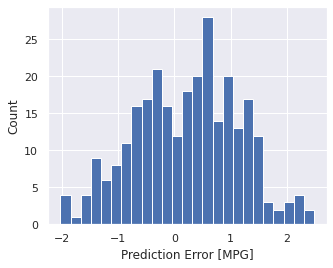

In [ ]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

# Тест

In [ ]:
pickle.dump(dnn_goal_model, open('dnn_goal_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://46d52242-9eef-4eba-b4e0-472d602c4428/assets


In [ ]:
model_load = pickle.load(open('dnn_goal_model.pkl', 'rb'))

In [ ]:
model_load.predict(X_test)

array([[3.2126215],
       [2.9460723],
       [3.1705816],
       [3.1782336],
       [3.3408623],
       [3.2868698],
       [3.2150488],
       [2.9796515],
       [2.988651 ],
       [3.4180055],
       [3.0579915],
       [3.3349438],
       [3.3668664],
       [3.1401107],
       [2.96926  ],
       [3.108448 ],
       [3.1354213],
       [3.122816 ],
       [3.3448322],
       [3.07556  ],
       [3.05353  ],
       [3.4091418],
       [3.5240445],
       [3.000726 ],
       [3.2352278],
       [3.0976484],
       [3.2551985],
       [3.3641999],
       [3.2551413],
       [2.9619532],
       [3.299745 ],
       [3.3291774],
       [3.179448 ],
       [3.4449542],
       [3.0880961],
       [3.049413 ],
       [3.1347642],
       [3.046434 ],
       [3.1027517],
       [3.3095126],
       [3.3154502],
       [3.1407762],
       [3.3465056],
       [3.2107744],
       [3.2750392],
       [3.2271585],
       [3.1325426],
       [3.3386416],
       [3.3047624],
       [3.0268898],
